# TITANIC SURVIVAL PREDICTION

# Importing all required modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from scipy import stats as sts
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,classification_report
import sklearn
import scipy

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Calculating the percentage of null value in each feature

In [7]:
def nullPercentage(dataSet):
    size=df.shape[0]
    for i in dataSet.columns:
        print(f"{i} : {(df[i].isnull().sum()/size)*100}")

In [8]:
nullPercentage(df)

PassengerId : 0.0
Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 19.865319865319865
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 77.10437710437711
Embarked : 0.22446689113355783


# Dropping the unneccessay features

In [9]:
df=df.drop(columns=['PassengerId','Cabin','Ticket'])

In [10]:
#filling the nan value with the mode as it categorical feature
df['Embarked']=df['Embarked'].fillna('S') 

In [11]:
df.groupby(['Survived','Pclass','Sex','SibSp'])['Age'].mean()

Survived  Pclass  Sex     SibSp
0         1       female  0        50.000000
                          1        13.500000
                  male    0        46.290698
                          1        41.625000
                          2        44.000000
                          3        19.000000
          2       female  0        39.666667
                          1        32.333333
                  male    0        33.541667
                          1        34.525000
                          2        25.000000
          3       female  0        26.020000
                          1        30.305556
                          2        16.000000
                          3         5.500000
                          4         7.000000
                          5        16.000000
                          8              NaN
                  male    0        29.573171
                          1        26.407407
                          2        28.666667
                       

In [12]:
#Fill the nan age values with grouped mean 
df['Age']=df['Age'].fillna(df.groupby(['Survived','Pclass','Sex','SibSp'])['Age'].transform('mean'))


In [13]:
df.shape

(891, 9)

In [14]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
df[df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,S
301,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,23.25,Q
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,S
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,S
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.55,S


In [16]:
df=df.dropna(subset=['Age'])

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [19]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [20]:
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Dr': 'Dr', 'Rev': 'Rev', 'Col': 'Col', 'Don': 'Don', 'Jonkheer': 'Noble', 'Capt': 'Capt',
    'Major': 'Major','Lady':'Lady','Sir':'Sir','the Countess':'the Countess'
}

In [21]:
df['Title']=df['Title'].map(title_mapping)

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [23]:
df=df.reset_index(drop=True)

In [24]:
print(df['Title'].isnull().sum())
df[df['Title'].isnull()]

1


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
754,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5,S,NaN


In [25]:
df.loc[754,'Title']='Countess'

In [26]:
print(df['Title'].isnull().sum())
df[df['Title'].isnull()]

0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [27]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [28]:
df.drop(columns=['Name'],inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [30]:
print(df['Survived'].value_counts())
df.describe()

Survived
0    542
1    341
Name: count, dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.386183,2.302378,29.607026,0.462061,0.369196,31.918289
std,0.487149,0.837246,13.536875,0.881582,0.796564,49.805557
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.573171,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.375000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [31]:
#Clearly we can see that there is ouliers in Fare and Age.Lets check it and remove the ouliers
df = df[(np.abs(sts.zscore(df[['Age','Fare']])) < 3).all(axis=1)]

In [32]:
print(df.shape)
df.describe()

(858, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.379953,2.335664,29.280795,0.458042,0.355478,26.186474
std,0.485658,0.820769,13.162762,0.875566,0.783865,29.287945
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,13.500000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,29.125000
max,1.000000,3.000000,70.000000,5.000000,6.000000,164.866700


# Univariant Analysis

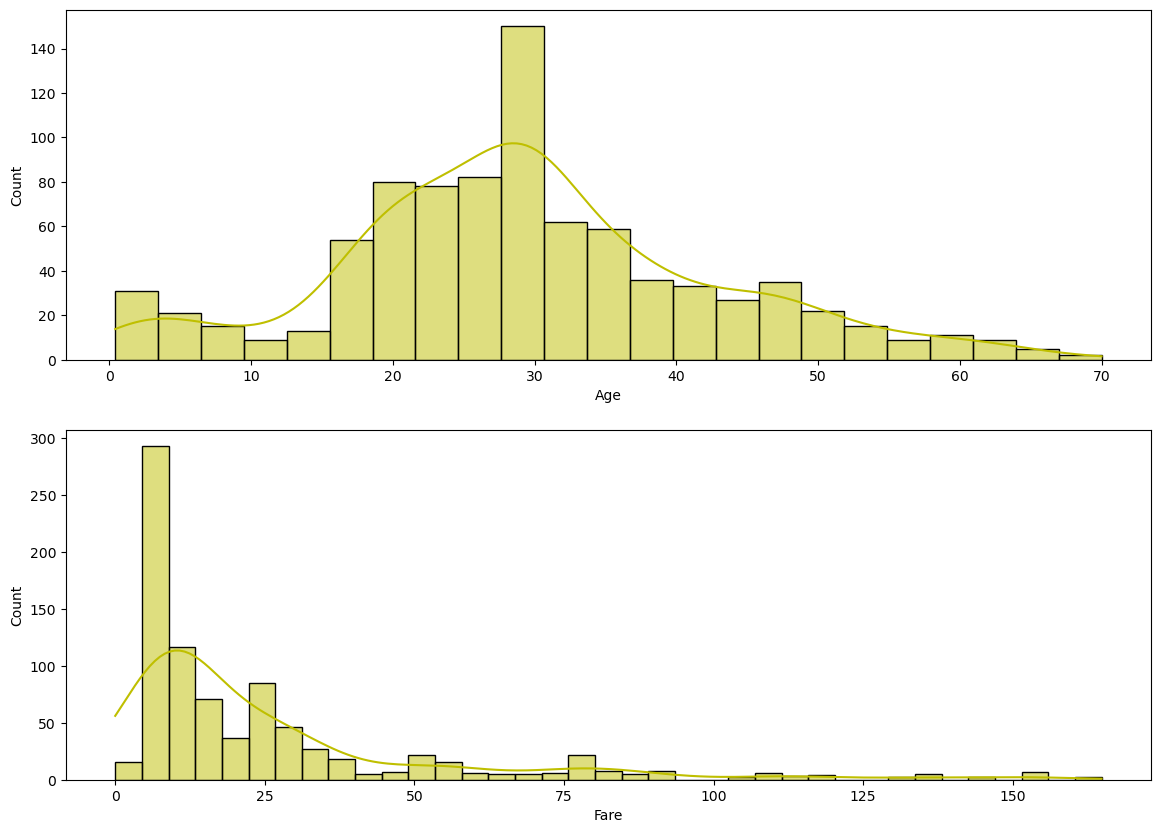

In [33]:
# AGE
plt.figure(figsize=(14,10))
for i,col in enumerate(['Age','Fare'],start=1):
    plt.subplot(2,1,i)
    sns.histplot(data=df,x=col,color='y',kde=True)

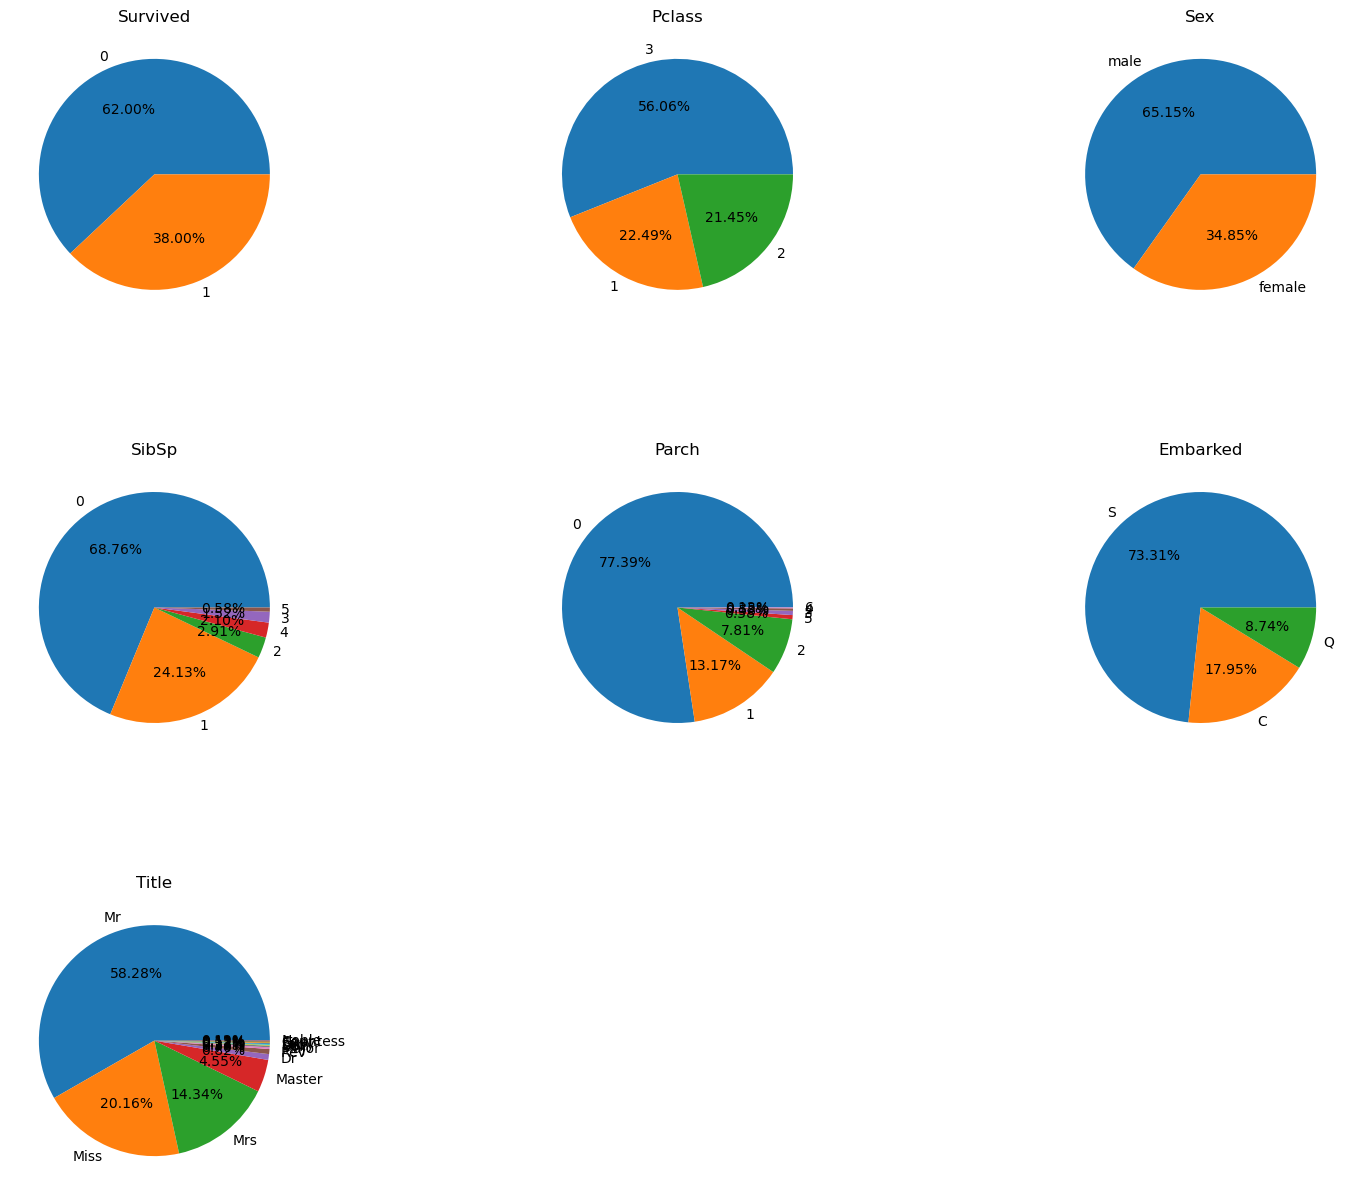

In [34]:
plt.figure(figsize=(18,15))
for i,col in enumerate(['Survived','Pclass','Sex','SibSp','Parch','Embarked','Title'],start=1):
    plt.subplot(3,3,i)
    counts=df[col].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
    plt.title(f"{col}")
    
plt.subplots_adjust(wspace=0.5,hspace=0.5)    

# Multivariate Analysis

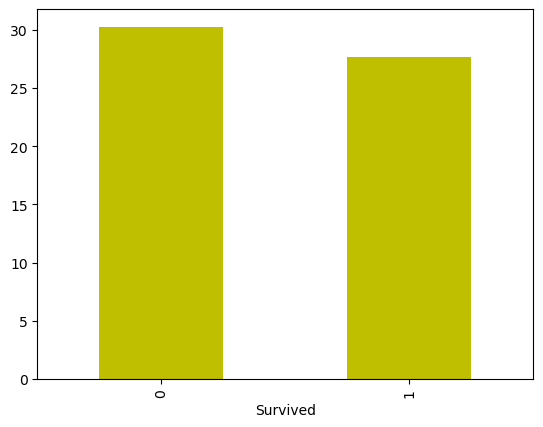

In [35]:
df.groupby(['Survived'])['Age'].mean().plot(kind='bar',color='y')
plt.show()

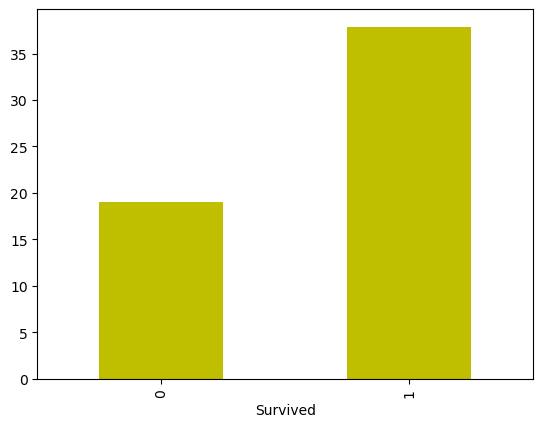

In [36]:
df.groupby(['Survived'])['Fare'].mean().plot(kind='bar',color='y')
plt.show()

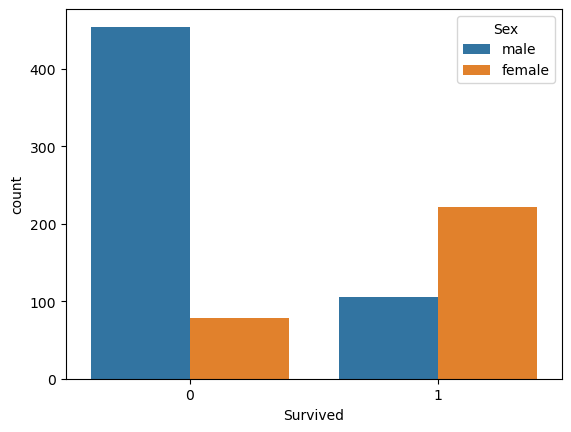

In [37]:
sns.countplot(data=df,x='Survived',hue='Sex')
plt.show()

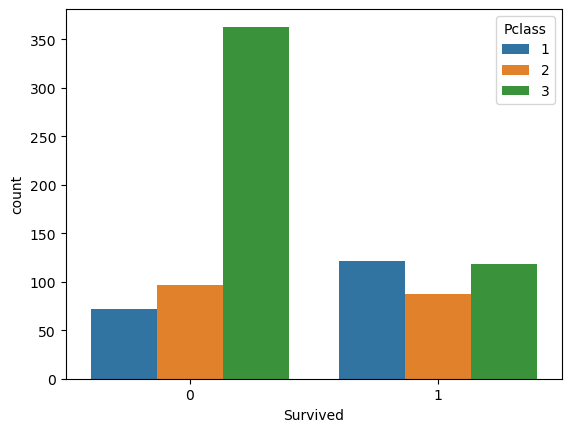

In [38]:
sns.countplot(data=df,x='Survived',hue='Pclass')
plt.show()

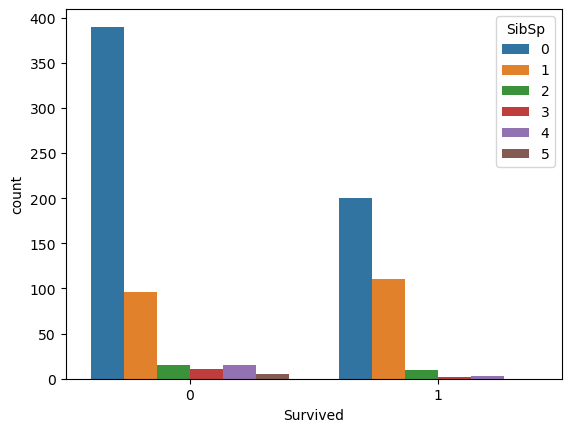

In [39]:
sns.countplot(data=df,x='Survived',hue='SibSp')
plt.show()

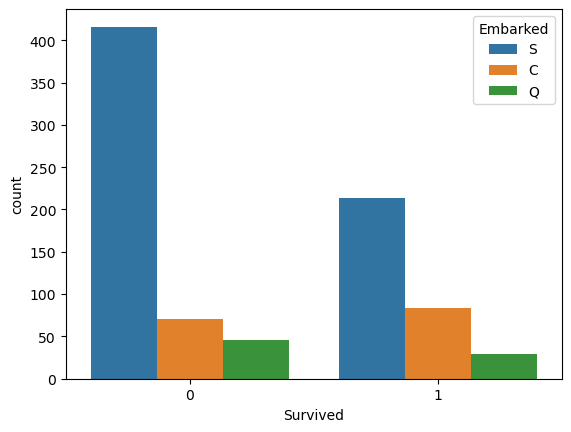

In [40]:
sns.countplot(data=df,x='Survived',hue='Embarked')
plt.show()

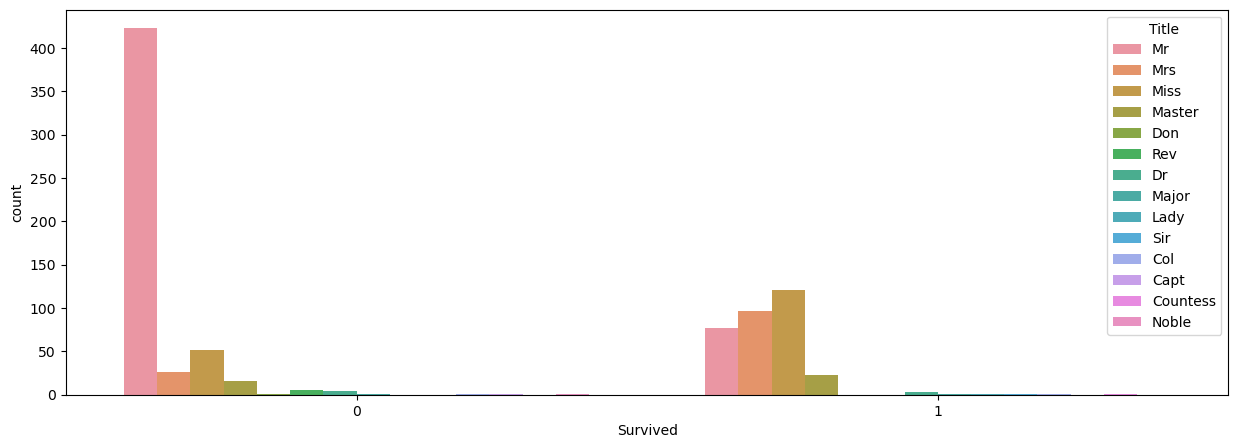

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Survived',hue='Title')
plt.show()

# EDA

In [42]:
df=pd.get_dummies(df,columns=['Sex','Embarked','Title'])

In [43]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev,Title_Sir
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0,2,27.000000,0,0,13.0000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
879,1,1,19.000000,0,0,30.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
880,0,3,30.305556,1,2,23.4500,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
881,1,1,26.000000,0,0,30.0000,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [44]:
corr=df.corr()

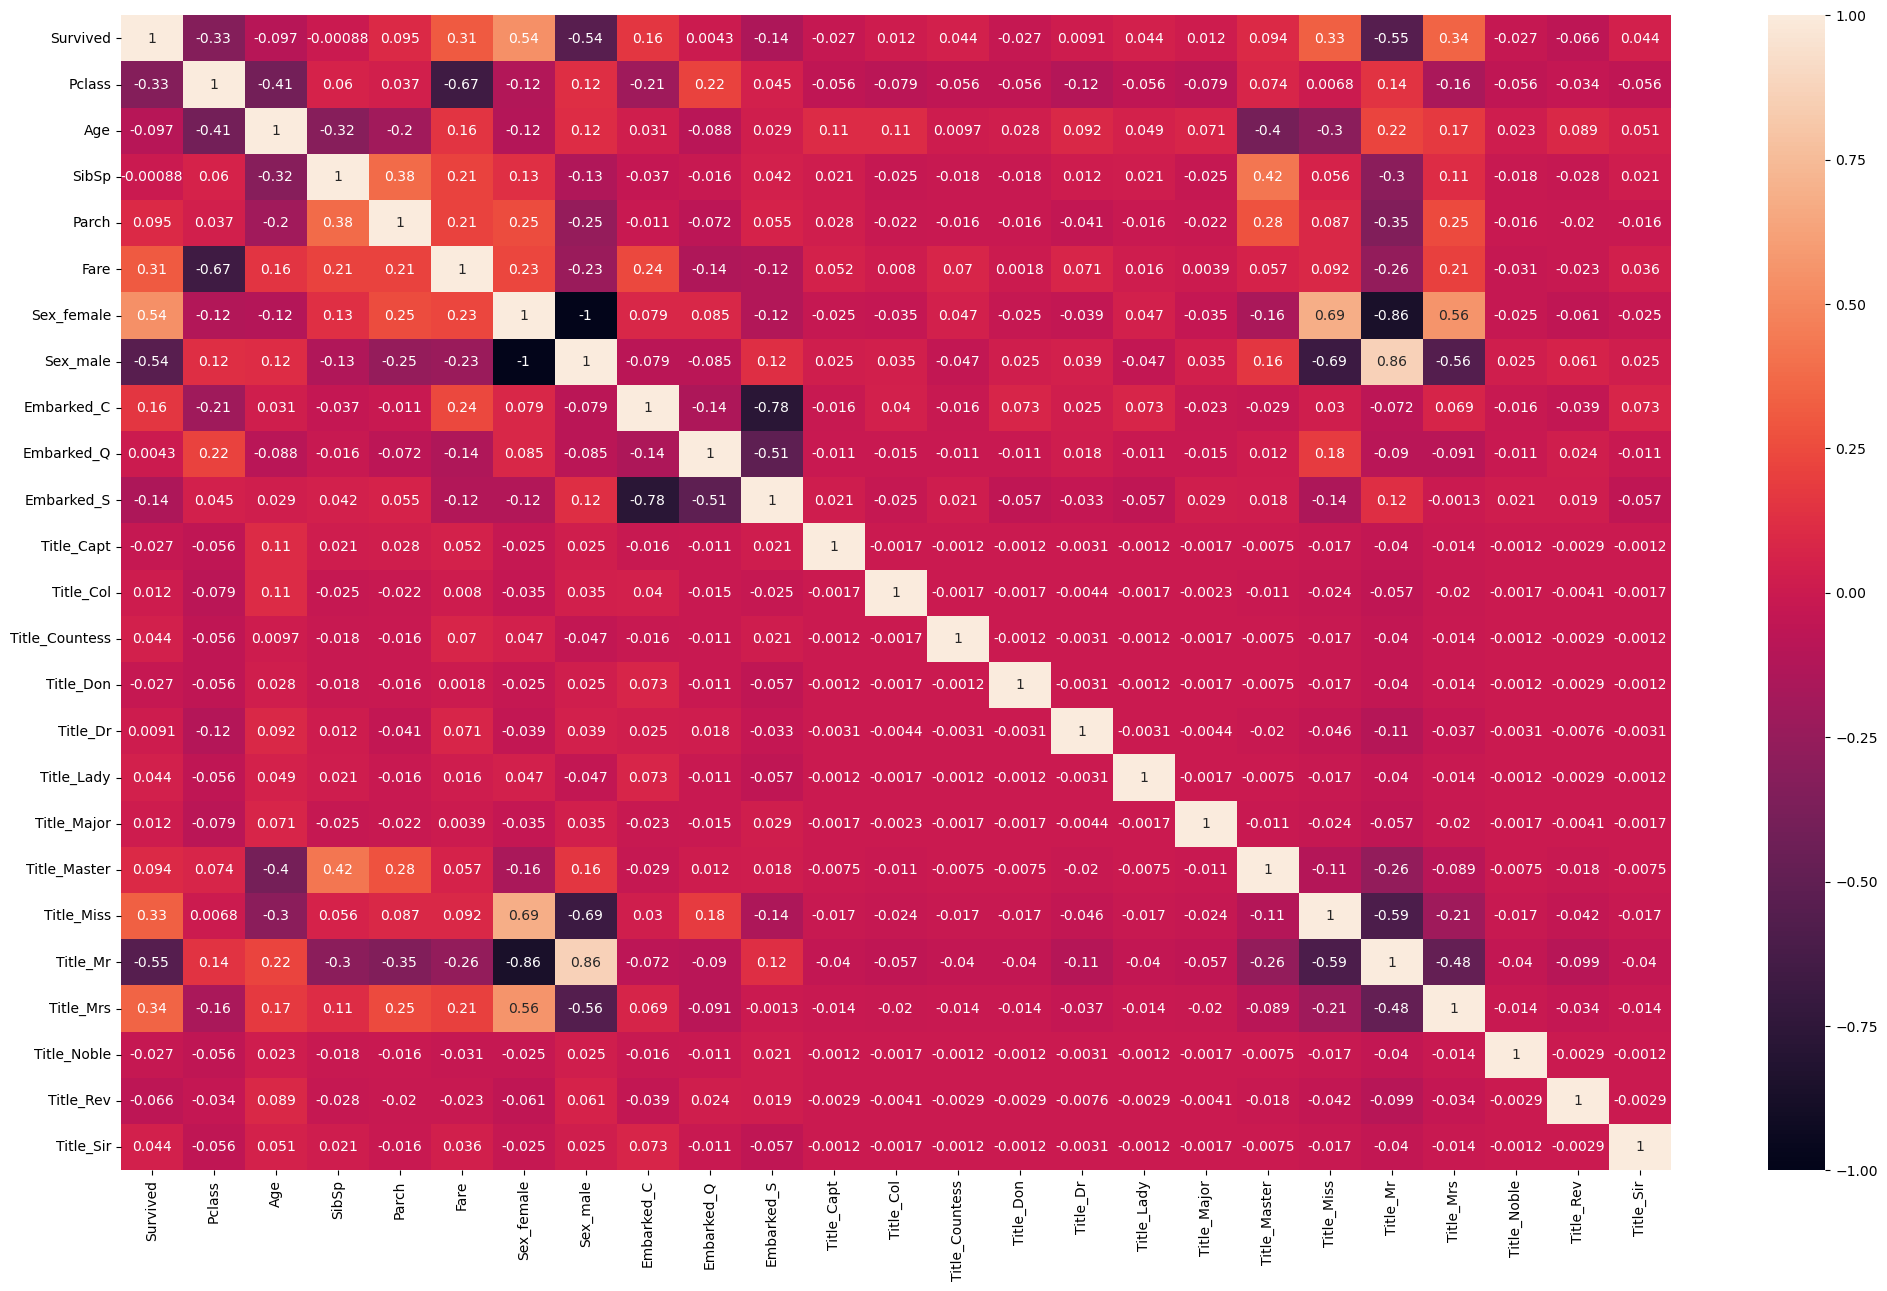

In [45]:
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)
plt.show()

In [46]:
X=df.iloc[:,1:]
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev,Title_Sir
0,3,22.000000,1,0,7.2500,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,38.000000,1,0,71.2833,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,35.000000,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,3,35.000000,0,0,8.0500,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,2,27.000000,0,0,13.0000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
879,1,19.000000,0,0,30.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
880,3,30.305556,1,2,23.4500,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
881,1,26.000000,0,0,30.0000,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [47]:
y=df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
878    0
879    1
880    0
881    1
882    0
Name: Survived, Length: 858, dtype: int64

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(686, 24) (172, 24) (686,) (172,)


 # Modeling 

In [9]:
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [50]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgbc=XGBClassifier()

In [51]:
def check(model):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    print(model)
    print("Accuracy Score : ",accuracy_score(y_test,y_predict))
    print("Precision Score : ",precision_score(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    y_train_pred=model.predict(X_train)
    print("Accuracy Score of train",accuracy_score(y_train,y_train_pred))
    print()

In [52]:
check(lr)
check(rfc)
check(abc)
check(gbc)
check(xgbc)

LogisticRegression()
Accuracy Score :  0.8546511627906976
Precision Score :  0.8194444444444444
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       101
           1       0.82      0.83      0.83        71

    accuracy                           0.85       172
   macro avg       0.85      0.85      0.85       172
weighted avg       0.86      0.85      0.85       172

Accuracy Score of train 0.8381924198250729

RandomForestClassifier()
Accuracy Score :  0.8023255813953488
Precision Score :  0.7534246575342466
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       101
           1       0.75      0.77      0.76        71

    accuracy                           0.80       172
   macro avg       0.80      0.80      0.80       172
weighted avg       0.80      0.80      0.80       172

Accuracy Score of train 0.9912536443148688

AdaBoostClassifier()
Accuracy Score :  0.8197674418604651
Prec

In [53]:
# As the accuracy and precision of both Logistic Regression and GBC is good so lets do the hyperparameter tuning of these two model and lets try to improve the accuracy and precison

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params_gbc={
     'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
gsc=GridSearchCV(estimator=gbc,param_grid=params_gbc,n_jobs=-1,cv=5)

In [57]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]})

In [58]:
gsc.best_score_

0.8600973236009732

In [59]:
gsc.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 0.8}

In [60]:
model=gsc.best_estimator_

In [61]:
model.score(X_train,y_train)
y_pred=model.predict(X_test)

In [62]:
model.score(X_test,y_test)

0.8488372093023255

In [63]:
from sklearn.metrics import confusion_matrix

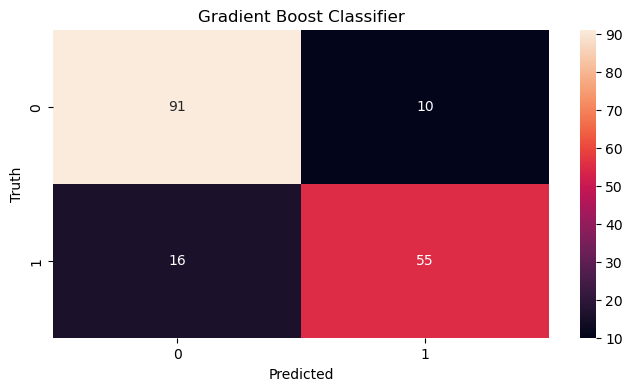

In [64]:
plt.figure(figsize=(8,4))
m=confusion_matrix(y_test,y_pred)
sns.heatmap(m,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Gradient Boost Classifier")
plt.show()

# Creating new data row and predicting it.

In [65]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev,Title_Sir
0,0,3,22.0,1,0,7.2500,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,1,1,38.0,1,0,71.2833,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,0,3,35.0,0,0,8.0500,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [66]:
data=pd.DataFrame({'Pclass':[3],'Age':[22.0],'SibSp':[1],'Parch':[0],'Fare':[7.2500],'Sex':['male'],'Embarked':['S'],'Title':['Mr']})

In [67]:
data=pd.get_dummies(data,columns=['Sex','Embarked','Title'])

In [68]:
data=data.reindex(columns=X.columns,fill_value=0)
data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev,Title_Sir
0,3,22.0,1,0,7.25,0,True,0,0,True,0,0,0,0,0,0,0,0,0,True,0,0,0,0


In [69]:
result=model.predict(data)

In [70]:
if result==0:
    print("Passenger Died")
else:
    print("Passenger Survived")
    

Passenger Died


In [71]:
import pickle
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [73]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [78]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)